# **ADA project**

* [Part I. Data Pre-Treatment](#PartI)    
    * [1) Pre-processing Data](#I.1)
        * [1.1) Import Data](#I.1.1)
        * [1.2) Are quotations unique?](#I.1.2)
        * [1.3) Punctuation Removal](#I.1.3)
        * [1.4) Lowering the text](#I.1.4)
        * [1.5) Tokenization](#I.1.5)
        * [1.6) Stop word removal](#I.1.6)
        * [1.7) Lemmatization](#I.1.7)
        * [1.8) Do we have only phase E quotations?](#I.1.8)
    * [2) Pre-analyzing Data](#2)
        * [2.1) Comparison before and after pre-processing](#I.2.1)
            * [2.1.1) Analysis about characters](#I.2.1.1)
            * [2.1.2) Analysis about words](#I.2.1.2)
        * [2.2) Selection of words AND comparison before and after selection](#I.2.2)
        * [2.3) Selection of quotations AND comparison before and after selection](#I.2.3)
            * [2.3.1) Dropping quotations where the main speaker is "None"](#I.2.3.1)
            * [2.3.2) Dropping quotations with too weak speaker probability](#I.2.3.2)
            * [2.3.3) Dropping quotations which do not have a sufficient number of words](#I.2.3.3)
        * [2.4) Final adjustments](#I.2.4)
* [Part II. Our project about Trump](#PartII) 
    * [1) Trump's quotations](#II.1)
        * [1.1) Question 1](#II.1.1)
    * [2) Quotations about Trump](#II.2)

In [1]:
import bz2
import json
import pandas as pd
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Part I. Data Pre-Treatment <a class="anchor" id="PartI"></a>

## 1) Pre-processing Data  <a class="anchor" id="I.1"></a>

### 1.1) Import Data  <a class="anchor" id="I.1.1"></a>

def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        print(chunk.columns)

with pd.read_json('quotes-2019-nytimes.json.bz2', lines=True, compression='bz2', chunksize=10) as df_reader:
    for chunk in df_reader:
        process_chunk(chunk)

**TODO : Remplacer le premier bloc de code ci-dessous par le bloc ci-dessus...??  
Ou voir Google Colab -> en tout cas il faut qu'on voit comment gérer la quantité de données + relier au Drive**

In [2]:
data = []
with bz2.open('quotes-2019-nytimes.json.bz2', "rt") as data_file :
    for line in data_file :
        try :
            lignedata = json.loads(line)
            data.append(lignedata)
        except:
            continue

df = pd.DataFrame()

df["quoteID"] = list(map(lambda d : d["quoteID"], data))
df["quotation"] = list(map(lambda d : d["quotation"], data))
df["speaker"] = list(map(lambda d : d["speaker"], data))
df["qids"] = list(map(lambda d : d["qids"], data))
df["date"] = list(map(lambda d : d["date"], data))
df["numOccurrences"] = list(map(lambda d : d["numOccurrences"], data))
df["probas"] = list(map(lambda d : d["probas"], data))
df["urls"] = list(map(lambda d : d["urls"], data))
df["phase"] = list(map(lambda d : d["phase"], data))

df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E


### 1.2) Are quotations unique?  <a class="anchor" id="I.1.2"></a>

In [3]:
print(f"Are quotations unique? {df.quotation.is_unique}")

Are quotations unique? True


### 1.3) Punctuation Removal  <a class="anchor" id="I.1.3"></a>

In [4]:
# Defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Storing the puntuation free text
df['quote_punctfree']= df['quotation'].apply(lambda x: remove_punctuation(x))

df.head()

# Question : garder les "-" ?? (cf. low-income)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,quote_punctfree
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,It is not a lowincome immigration
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,a champion figure skater switching to roller s...
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E,It makes it much more difficult for him to mak...
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,It puts me in a predicament
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E,A Pile of Leaves


### 1.4) Lowering the text  <a class="anchor" id="I.1.4"></a>

In [5]:
df['quote_punctfree_low'] = df['quote_punctfree'].apply(lambda x: x.lower())

df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,quote_punctfree,quote_punctfree_low
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,It is not a lowincome immigration,it is not a lowincome immigration
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,a champion figure skater switching to roller s...,a champion figure skater switching to roller s...
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E,It makes it much more difficult for him to mak...,it makes it much more difficult for him to mak...
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,It puts me in a predicament,it puts me in a predicament
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E,A Pile of Leaves,a pile of leaves


### 1.5) Tokenization  <a class="anchor" id="I.1.5"></a>

In [6]:
# Defining function for tokenization
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens

# Applying function to the column
df['quote_punctfree_low_token']= df['quote_punctfree_low'].apply(lambda x: tokenization(x))

df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,quote_punctfree,quote_punctfree_low,quote_punctfree_low_token
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,It is not a lowincome immigration,it is not a lowincome immigration,"[it, is, not, a, lowincome, immigration]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,a champion figure skater switching to roller s...,a champion figure skater switching to roller s...,"[a, champion, figure, skater, switching, to, r..."
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E,It makes it much more difficult for him to mak...,it makes it much more difficult for him to mak...,"[it, makes, it, much, more, difficult, for, hi..."
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,It puts me in a predicament,it puts me in a predicament,"[it, puts, me, in, a, predicament]"
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E,A Pile of Leaves,a pile of leaves,"[a, pile, of, leaves]"


### 1.6) Stop word removal  <a class="anchor" id="I.1.6"></a>

In [7]:
# Stop words present in the library
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# Defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

# Applying the function
df['quote_punctfree_low_token_NoStopWord'] = df['quote_punctfree_low_token'].apply(lambda x: remove_stopwords(x))

df.head()

[nltk_data] Downloading package stopwords to /home/eliot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,quote_punctfree,quote_punctfree_low,quote_punctfree_low_token,quote_punctfree_low_token_NoStopWord
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,It is not a lowincome immigration,it is not a lowincome immigration,"[it, is, not, a, lowincome, immigration]","[lowincome, immigration]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,a champion figure skater switching to roller s...,a champion figure skater switching to roller s...,"[a, champion, figure, skater, switching, to, r...","[champion, figure, skater, switching, roller, ..."
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E,It makes it much more difficult for him to mak...,it makes it much more difficult for him to mak...,"[it, makes, it, much, more, difficult, for, hi...","[makes, much, difficult, make, compromises, ne..."
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,It puts me in a predicament,it puts me in a predicament,"[it, puts, me, in, a, predicament]","[puts, predicament]"
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E,A Pile of Leaves,a pile of leaves,"[a, pile, of, leaves]","[pile, leaves]"


### 1.7) Lemmatization  <a class="anchor" id="I.1.7"></a>

In [8]:
# Defining the object for Lemmatization
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

# Defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

# Applying the function
df['quote_punctfree_low_token_NoStopWord_lemm'] = df['quote_punctfree_low_token_NoStopWord'].apply(lambda x: lemmatizer(x))
df['final_quote'] = df['quote_punctfree_low_token_NoStopWord_lemm']

df.head()

[nltk_data] Downloading package wordnet to /home/eliot/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,quote_punctfree,quote_punctfree_low,quote_punctfree_low_token,quote_punctfree_low_token_NoStopWord,quote_punctfree_low_token_NoStopWord_lemm,final_quote
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,It is not a lowincome immigration,it is not a lowincome immigration,"[it, is, not, a, lowincome, immigration]","[lowincome, immigration]","[lowincome, immigration]","[lowincome, immigration]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,a champion figure skater switching to roller s...,a champion figure skater switching to roller s...,"[a, champion, figure, skater, switching, to, r...","[champion, figure, skater, switching, roller, ...","[champion, figure, skater, switching, roller, ...","[champion, figure, skater, switching, roller, ..."
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E,It makes it much more difficult for him to mak...,it makes it much more difficult for him to mak...,"[it, makes, it, much, more, difficult, for, hi...","[makes, much, difficult, make, compromises, ne...","[make, much, difficult, make, compromise, needed]","[make, much, difficult, make, compromise, needed]"
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,It puts me in a predicament,it puts me in a predicament,"[it, puts, me, in, a, predicament]","[puts, predicament]","[put, predicament]","[put, predicament]"
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E,A Pile of Leaves,a pile of leaves,"[a, pile, of, leaves]","[pile, leaves]","[pile, leaf]","[pile, leaf]"


### 1.8) Do we have only phase E quotations?  <a class="anchor" id="1.8"></a>

In [9]:
df.groupby(df.phase).agg('count')

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,quote_punctfree,quote_punctfree_low,quote_punctfree_low_token,quote_punctfree_low_token_NoStopWord,quote_punctfree_low_token_NoStopWord_lemm,final_quote
phase,,,,,,,,,,,,,,
E,207527,207527,207527,207527,207527,207527,207527,207527,207527,207527,207527,207527,207527,207527


## 2) Pre-analyzing Data  <a class="anchor" id="I.2"></a>

### 2.1) Comparison before and after pre-processing  <a class="anchor" id="I.2.1"></a>

 #### 2.1.1) Analysis about characters <a class="anchor" id="I.2.1.1"></a>

#### 2.1.1) Analysis about characters  <a class="anchor" id="2.1.1"></a>

In [10]:
# Creation of a new table for the analysis
analyze = df.loc[:, ['quoteID', 'quotation', 'final_quote']].copy(deep=True)

In [11]:
# Creation of a new column with the number of characters per citation (spaces included)
analyze["ch_quote"] = analyze["quotation"].apply(lambda x: len(x))

analyze.head()

,quoteID,quotation,final_quote,ch_quote
0,2019-04-17-024782,"It is not a low-income immigration,","[lowincome, immigration]",35
1,2019-04-02-001128,a champion figure skater switching to roller s...,"[champion, figure, skater, switching, roller, ...",52
2,2019-05-09-055187,It makes it much more difficult for him to mak...,"[make, much, difficult, make, compromise, needed]",71
3,2019-10-31-056366,"It puts me in a predicament,","[put, predicament]",28
4,2019-01-04-001792,A Pile of Leaves.,"[pile, leaf]",17


In [12]:
# Creation of a new column with the number of characters of the final quote without tokenization
analyze["ch_final_quote"] = (df["final_quote"].apply(lambda x: ' '.join(x))).apply(lambda x: len(x))

analyze.head()

,quoteID,quotation,final_quote,ch_quote,ch_final_quote
0,2019-04-17-024782,"It is not a low-income immigration,","[lowincome, immigration]",35,21
1,2019-04-02-001128,a champion figure skater switching to roller s...,"[champion, figure, skater, switching, roller, ...",52,45
2,2019-05-09-055187,It makes it much more difficult for him to mak...,"[make, much, difficult, make, compromise, needed]",71,42
3,2019-10-31-056366,"It puts me in a predicament,","[put, predicament]",28,15
4,2019-01-04-001792,A Pile of Leaves.,"[pile, leaf]",17,9


In [13]:
# Creation of a new column with the percentage of characters removed after pre-processing
analyze["ch_removed"] = (analyze["ch_quote"]-analyze["ch_final_quote"])*100/analyze["ch_quote"]

analyze.head()

,quoteID,quotation,final_quote,ch_quote,ch_final_quote,ch_removed
0,2019-04-17-024782,"It is not a low-income immigration,","[lowincome, immigration]",35,21,40.000000
1,2019-04-02-001128,a champion figure skater switching to roller s...,"[champion, figure, skater, switching, roller, ...",52,45,13.461538
2,2019-05-09-055187,It makes it much more difficult for him to mak...,"[make, much, difficult, make, compromise, needed]",71,42,40.845070
3,2019-10-31-056366,"It puts me in a predicament,","[put, predicament]",28,15,46.428571
4,2019-01-04-001792,A Pile of Leaves.,"[pile, leaf]",17,9,47.058824


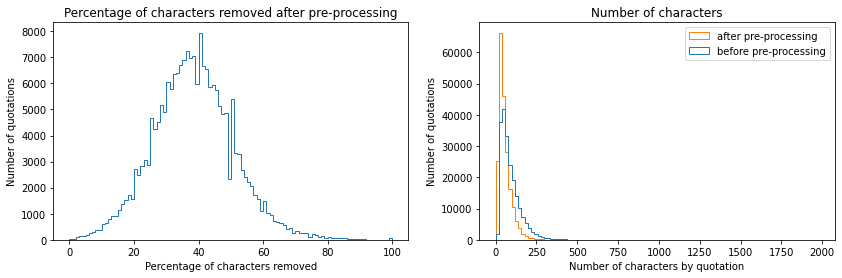

In [14]:
# Plot the distribution of the number of characters by quotation before pre-processing data and after pre-processing data
# And plot of the distribution of the percentage of characters removed after pre-processing

fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].hist(analyze.ch_removed, bins=100, histtype='step')
ax[0].set_title('Percentage of characters removed after pre-processing')
ax[0].set_xlabel('Percentage of characters removed')
ax[0].set_ylabel('Number of quotations')

ax[1].hist([analyze.ch_quote, analyze.ch_final_quote], bins=100, histtype='step', label=['before pre-processing', 'after pre-processing'])
ax[1].set_title('Number of characters')
ax[1].set_xlabel('Number of characters by quotation')
ax[1].set_ylabel('Number of quotations')

plt.legend()
plt.show()

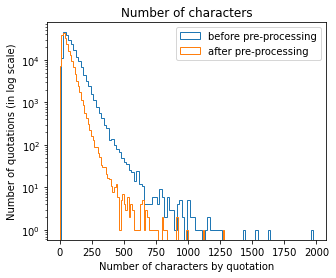

In [15]:
# Same but with log scale for the x-axis
plt.figure(figsize=(5,4))
array0 = plt.hist(analyze.ch_quote, bins=100, log=True, histtype='step')
array1 = plt.hist(analyze.ch_final_quote, bins=100, log=True, histtype='step')
plt.xlabel('Number of characters by quotation')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of characters')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

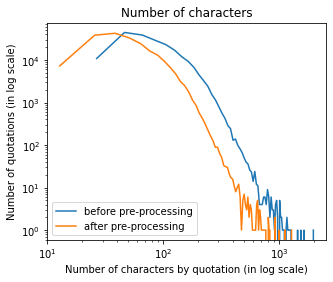

In [16]:
# Same but with log scale for the x-axis and the y-axis
plt.figure(figsize=(5,4))
plt.loglog(array0[1][1:],array0[0])
plt.loglog(array1[1][1:],array1[0])
plt.xlabel('Number of characters by quotation (in log scale)')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of characters')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

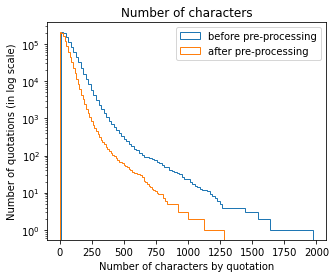

In [17]:
# Same but with log scale for the y-axis and cumulative
plt.figure(figsize=(5,4))
array_cumulative0 = plt.hist(analyze.ch_quote, bins=100, log=True, histtype='step', cumulative=-1)
array_cumulative1 = plt.hist(analyze.ch_final_quote, bins=100, log=True, histtype='step', cumulative=-1)
plt.xlabel('Number of characters by quotation')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of characters')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

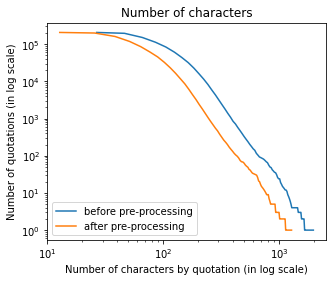

In [18]:
# Same but with log scale for the x-axis and the y-axis and cumulative
plt.figure(figsize=(5,4))
plt.loglog(array_cumulative0[1][1:],array_cumulative0[0])
plt.loglog(array_cumulative1[1][1:],array_cumulative1[0])
plt.xlabel('Number of characters by quotation (in log scale)')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of characters')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

#### 2.1.2) Analysis about words  <a class="anchor" id="I.2.1.2"></a>

In [19]:
# Creation of a two columns with the number of words per citation before and after NoStopWord (cf. pre-processing)
analyze["wd_quote"] = df["quote_punctfree_low_token"].apply(lambda x: len(x))
analyze["wd_final_quote"] = df["final_quote"].apply(lambda x: len(x))

analyze.head()

,quoteID,quotation,final_quote,ch_quote,ch_final_quote,ch_removed,wd_quote,wd_final_quote
0,2019-04-17-024782,"It is not a low-income immigration,","[lowincome, immigration]",35,21,40.000000,6,2
1,2019-04-02-001128,a champion figure skater switching to roller s...,"[champion, figure, skater, switching, roller, ...",52,45,13.461538,8,6
2,2019-05-09-055187,It makes it much more difficult for him to mak...,"[make, much, difficult, make, compromise, needed]",71,42,40.845070,13,6
3,2019-10-31-056366,"It puts me in a predicament,","[put, predicament]",28,15,46.428571,6,2
4,2019-01-04-001792,A Pile of Leaves.,"[pile, leaf]",17,9,47.058824,4,2


In [20]:
# Creation of a new column with the percentage of words removed after pre-processing
analyze["wd_removed"] = (analyze["wd_quote"]-analyze["wd_final_quote"])*100/analyze["wd_quote"]

analyze.head()

,quoteID,quotation,final_quote,ch_quote,ch_final_quote,ch_removed,wd_quote,wd_final_quote,wd_removed
0,2019-04-17-024782,"It is not a low-income immigration,","[lowincome, immigration]",35,21,40.000000,6,2,66.666667
1,2019-04-02-001128,a champion figure skater switching to roller s...,"[champion, figure, skater, switching, roller, ...",52,45,13.461538,8,6,25.000000
2,2019-05-09-055187,It makes it much more difficult for him to mak...,"[make, much, difficult, make, compromise, needed]",71,42,40.845070,13,6,53.846154
3,2019-10-31-056366,"It puts me in a predicament,","[put, predicament]",28,15,46.428571,6,2,66.666667
4,2019-01-04-001792,A Pile of Leaves.,"[pile, leaf]",17,9,47.058824,4,2,50.000000


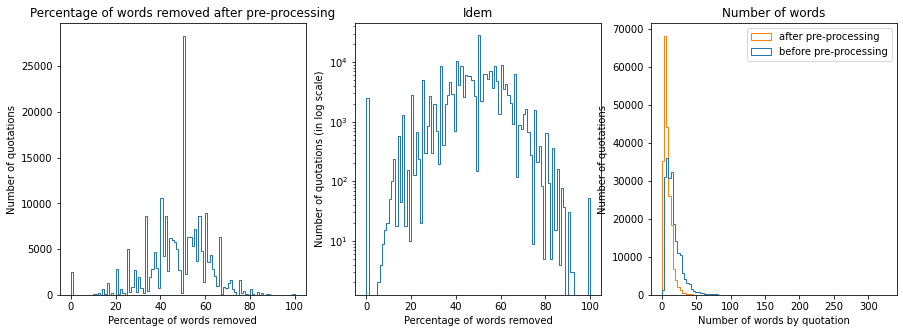

In [21]:
# Plot the distribution of the number of words by quotation before pre-processing data and after pre-processing data
# And plot of the distribution of the percentage of words removed after pre-processing

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].hist(analyze.wd_removed, bins=100, histtype='step')
ax[0].set_title('Percentage of words removed after pre-processing')
ax[0].set_xlabel('Percentage of words removed')
ax[0].set_ylabel('Number of quotations')

ax[1].hist(analyze.wd_removed, bins=100, log=True, histtype='step')
ax[1].set_title('Idem')
ax[1].set_xlabel('Percentage of words removed')
ax[1].set_ylabel('Number of quotations (in log scale)')

ax[2].hist([analyze.wd_quote, analyze.wd_final_quote], bins=100, histtype='step', label=['before pre-processing', 'after pre-processing'])
ax[2].set_title('Number of words')
ax[2].set_xlabel('Number of words by quotation')
ax[2].set_ylabel('Number of quotations')

plt.legend()
plt.show()

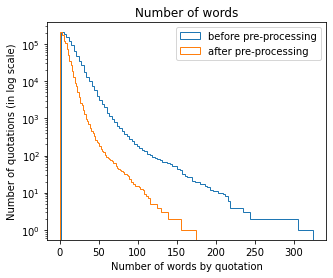

In [22]:
# Same but with log scale for the y-axis and cumulative
plt.figure(figsize=(5,4))
array_cumulative0 = plt.hist(analyze.wd_quote, bins=100, log=True, histtype='step', cumulative=-1)
array_cumulative1 = plt.hist(analyze.wd_final_quote, bins=100, log=True, histtype='step', cumulative=-1)
plt.xlabel('Number of words by quotation')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of words')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

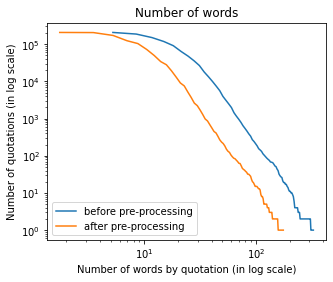

In [23]:
# Same but with log scale for the x-axis and the y-axis and cumulative
plt.figure(figsize=(5,4))
plt.loglog(array_cumulative0[1][1:],array_cumulative0[0])
plt.loglog(array_cumulative1[1][1:],array_cumulative1[0])
plt.xlabel('Number of words by quotation (in log scale)')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of words')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

### 2.2) Selection of words AND comparison before and after selection  <a class="anchor" id="I.2.2"></a>

In [24]:
analyze[analyze['wd_final_quote']<10]['final_quote'].head(20)

0                              [lowincome, immigration]
1     [champion, figure, skater, switching, roller, ...
2     [make, much, difficult, make, compromise, needed]
3                                    [put, predicament]
4                                          [pile, leaf]
5                                       [senator, call]
6                                [thorn, side, cabinet]
7                                                [lark]
8                    [success, relief, technical, feat]
9          [always, appreciates, respect, work, advice]
10          [crazy, cant, even, really, explain, right]
12    [soon, gumballs, hit, dont, hit, luke, wilson,...
14                 [ive, never, show, thats, immediate]
16                  [ive, never, seen, base, energized]
17                            [dangerous, walk, street]
18    [betty, succinct, point, steely, eye, respecte...
20            [didnt, seem, like, worldwide, big, todo]
21                       [taken, heck, long, tim

In [25]:
# Create a column with the number of characters per word
analyze["ch_per_wd"] = analyze["final_quote"].apply(lambda x: [len(x[i]) for i in range (0, len(x))])
analyze.head()

,quoteID,quotation,final_quote,ch_quote,ch_final_quote,ch_removed,wd_quote,wd_final_quote,wd_removed,ch_per_wd
0,2019-04-17-024782,"It is not a low-income immigration,","[lowincome, immigration]",35,21,40.000000,6,2,66.666667,"[9, 11]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,"[champion, figure, skater, switching, roller, ...",52,45,13.461538,8,6,25.000000,"[8, 6, 6, 9, 6, 5]"
2,2019-05-09-055187,It makes it much more difficult for him to mak...,"[make, much, difficult, make, compromise, needed]",71,42,40.845070,13,6,53.846154,"[4, 4, 9, 4, 10, 6]"
3,2019-10-31-056366,"It puts me in a predicament,","[put, predicament]",28,15,46.428571,6,2,66.666667,"[3, 11]"
4,2019-01-04-001792,A Pile of Leaves.,"[pile, leaf]",17,9,47.058824,4,2,50.000000,"[4, 4]"


In [26]:
# Median of number of character per words
list_ch_per_word = []
for ligne in analyze["ch_per_wd"] :
    list_ch_per_word += ligne

pd.Series(list_ch_per_word).median()    

6.0

In [27]:
# Dropping words with less than 3 characters (3 included)

def drop_words(quote) :
    new_quote = []
    for word in quote :
        if len(word) > 3 :
            new_quote.append(word)
    return new_quote
   
df["final_quote_SelectWd"] = df["final_quote"].apply(drop_words) 

df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,quote_punctfree,quote_punctfree_low,quote_punctfree_low_token,quote_punctfree_low_token_NoStopWord,quote_punctfree_low_token_NoStopWord_lemm,final_quote,final_quote_SelectWd
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,It is not a lowincome immigration,it is not a lowincome immigration,"[it, is, not, a, lowincome, immigration]","[lowincome, immigration]","[lowincome, immigration]","[lowincome, immigration]","[lowincome, immigration]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,a champion figure skater switching to roller s...,a champion figure skater switching to roller s...,"[a, champion, figure, skater, switching, to, r...","[champion, figure, skater, switching, roller, ...","[champion, figure, skater, switching, roller, ...","[champion, figure, skater, switching, roller, ...","[champion, figure, skater, switching, roller, ..."
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E,It makes it much more difficult for him to mak...,it makes it much more difficult for him to mak...,"[it, makes, it, much, more, difficult, for, hi...","[makes, much, difficult, make, compromises, ne...","[make, much, difficult, make, compromise, needed]","[make, much, difficult, make, compromise, needed]","[make, much, difficult, make, compromise, needed]"
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,It puts me in a predicament,it puts me in a predicament,"[it, puts, me, in, a, predicament]","[puts, predicament]","[put, predicament]","[put, predicament]",[predicament]
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E,A Pile of Leaves,a pile of leaves,"[a, pile, of, leaves]","[pile, leaves]","[pile, leaf]","[pile, leaf]","[pile, leaf]"


In [28]:
# Add quotations words selected to analyze dataframe :
analyze["final_quote_SelectWd"] = df["final_quote_SelectWd"]

# Create a column with the number of characters per selected word
analyze["ch_per_SelectWd"] = analyze["final_quote_SelectWd"].apply(lambda x: [len(x[i]) for i in range (0, len(x))])
analyze.head() 

,quoteID,quotation,final_quote,ch_quote,ch_final_quote,ch_removed,wd_quote,wd_final_quote,wd_removed,ch_per_wd,final_quote_SelectWd,ch_per_SelectWd
0,2019-04-17-024782,"It is not a low-income immigration,","[lowincome, immigration]",35,21,40.000000,6,2,66.666667,"[9, 11]","[lowincome, immigration]","[9, 11]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,"[champion, figure, skater, switching, roller, ...",52,45,13.461538,8,6,25.000000,"[8, 6, 6, 9, 6, 5]","[champion, figure, skater, switching, roller, ...","[8, 6, 6, 9, 6, 5]"
2,2019-05-09-055187,It makes it much more difficult for him to mak...,"[make, much, difficult, make, compromise, needed]",71,42,40.845070,13,6,53.846154,"[4, 4, 9, 4, 10, 6]","[make, much, difficult, make, compromise, needed]","[4, 4, 9, 4, 10, 6]"
3,2019-10-31-056366,"It puts me in a predicament,","[put, predicament]",28,15,46.428571,6,2,66.666667,"[3, 11]",[predicament],[11]
4,2019-01-04-001792,A Pile of Leaves.,"[pile, leaf]",17,9,47.058824,4,2,50.000000,"[4, 4]","[pile, leaf]","[4, 4]"


In [29]:
# Median of number of character per selected words
list_ch_per_word = []
for ligne in analyze["ch_per_SelectWd"] :
    list_ch_per_word += ligne

pd.Series(list_ch_per_word).median()

6.0

### 2.3) Selection of quotations AND comparison before and after selection  <a class="anchor" id="I.2.3"></a>

In [30]:
# Creation of a new dataframe where we will select only interesting quotations
df_select = df.copy(deep=True)
df_select = df.drop(['quote_punctfree', 'quote_punctfree_low', 'quote_punctfree_low_token', 'quote_punctfree_low_token_NoStopWord', 'quote_punctfree_low_token_NoStopWord_lemm', 'final_quote'], 1)
df_select.head()

/tmp/ipykernel_13652/1247061734.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_select = df.drop(['quote_punctfree', 'quote_punctfree_low', 'quote_punctfree_low_token', 'quote_punctfree_low_token_NoStopWord', 'quote_punctfree_low_token_NoStopWord_lemm', 'final_quote'], 1)


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,final_quote_SelectWd
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,"[lowincome, immigration]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,"[champion, figure, skater, switching, roller, ..."
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E,"[make, much, difficult, make, compromise, needed]"
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,[predicament]
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E,"[pile, leaf]"


In [31]:
# Number of quotations before doing the selection
NbIni_quotes = len(df_select)
NbIni_quotes

207527

In [32]:
# Checking that there is no NA for quotations and speakers
print("{} of NA quotations".format(df_select[df_select.quotation.isnull()].shape[0]))
print("{} of NA speakers".format(df_select[df_select.speaker.isnull()].shape[0]))

0 of NA quotations
0 of NA speakers


#### 2.3.1) Dropping quotations where the main speaker is "None"  <a class="anchor" id="I.2.3.1"></a>

In [33]:
# Dropping rows where the main speaker is "None"
indexNames = df_select[df_select['speaker']=='None'].index
df_select.drop(indexNames, inplace=True)
df_select.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,final_quote_SelectWd
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,"[lowincome, immigration]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,"[champion, figure, skater, switching, roller, ..."
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,[predicament]
5,2019-08-15-002017,A Senator we can call our own.,Tom Rath,[Q7817334],2019-08-15 22:36:33,1,"[[Tom Rath, 0.7598], [None, 0.1993], [Warren R...",[http://www.nytimes.com/2019/08/15/us/politics...,E,"[senator, call]"
8,2019-07-22-032883,"It's a success, a relief and a technical feat,",Florence Parly,[Q3074013],2019-07-22 02:37:50,21,"[[Florence Parly, 0.9262], [None, 0.0738]]",[http://www.breitbart.com/news/french-submarin...,E,"[success, relief, technical, feat]"


In [34]:
# Number/Percentage of quotations removed because their main author was "None"
print(f"{NbIni_quotes - len(df_select)} quotations has been removed.")
print(f"{(NbIni_quotes - len(df_select))*100/NbIni_quotes:.0f}% of quotations has been removed.")

75582 quotations has been removed.
36% of quotations has been removed.


#### 2.3.2) Dropping quotations with too weak speaker probability  <a class="anchor" id="I.2.3.2"></a>

Text(0, 0.5, 'Number of quotations')

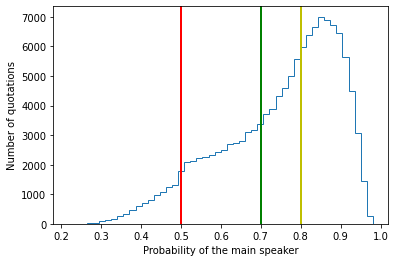

In [35]:
# Distribution of the probability attributed to the main speaker
proba_speaker1 = df_select['probas'].apply(lambda x: x[0][1]).astype(float)
plt.hist(proba_speaker1, bins=50, histtype='step')
plt.axvline(x=0.5, linewidth=2, color='r')
plt.axvline(x=0.7, linewidth=2, color='g')
plt.axvline(x=0.8, linewidth=2, color='y')
plt.xlabel('Probability of the main speaker')
plt.ylabel('Number of quotations')

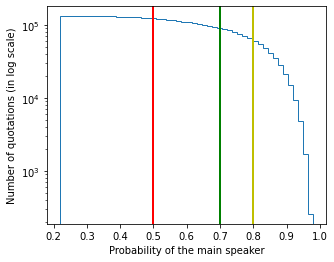

In [36]:
# Same but with log scale for the y-axis and cumulative
plt.figure(figsize=(5,4))
array_cumulative = plt.hist(proba_speaker1, bins=50, log=True, histtype='step', cumulative=-1)
plt.axvline(x=0.5, linewidth=2, color='r')
plt.axvline(x=0.7, linewidth=2, color='g')
plt.axvline(x=0.8, linewidth=2, color='y')
plt.xlabel('Probability of the main speaker')
plt.ylabel('Number of quotations (in log scale)')
plt.show()

In [37]:
# Percentage of quotations removed with the probability p attributed to the main speaker >=0.5 or >=0.7 or >=0.8
print(f"{(len(proba_speaker1[proba_speaker1<0.5]))*100/len(proba_speaker1):.0f}% of quotations would be removed if p>=0.5.")
print(f"{(len(proba_speaker1[proba_speaker1<0.7]))*100/len(proba_speaker1):.0f}% of quotations would be removed if p>=0.7.")
print(f"{(len(proba_speaker1[proba_speaker1<0.8]))*100/len(proba_speaker1):.0f}% of quotations would be removed if p>=0.8.")

# Median probability for the main speaker if if p>=0.5 or p>=0.7 or >=0.8
print(f"p_median = {proba_speaker1[proba_speaker1<0.5].median()} if p>=0.5.")
print(f"p_median = {proba_speaker1[proba_speaker1<0.7].median()} if p>=0.7.")
print(f"p_median = {proba_speaker1[proba_speaker1<0.8].median()} if p>=0.8.")

7% of quotations would be removed if p>=0.5.
32% of quotations would be removed if p>=0.7.
54% of quotations would be removed if p>=0.8.
p_median = 0.4448 if p>=0.5.
p_median = 0.5861 if p>=0.7.
p_median = 0.6691 if p>=0.8.


In [38]:
# Dropping rows where the probability of the main speaker is <0.7
indexNames = df_select[df_select['probas'].apply(lambda x: x[0][1]).astype(float)<0.5].index
df_select.drop(indexNames, inplace=True)
df_select.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,final_quote_SelectWd
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E,"[lowincome, immigration]"
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E,"[champion, figure, skater, switching, roller, ..."
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E,[predicament]
5,2019-08-15-002017,A Senator we can call our own.,Tom Rath,[Q7817334],2019-08-15 22:36:33,1,"[[Tom Rath, 0.7598], [None, 0.1993], [Warren R...",[http://www.nytimes.com/2019/08/15/us/politics...,E,"[senator, call]"
8,2019-07-22-032883,"It's a success, a relief and a technical feat,",Florence Parly,[Q3074013],2019-07-22 02:37:50,21,"[[Florence Parly, 0.9262], [None, 0.0738]]",[http://www.breitbart.com/news/french-submarin...,E,"[success, relief, technical, feat]"


#### 2.3.3) Dropping quotations which do not have a sufficient number of words   <a class="anchor" id="I.2.3.3"></a>

In [39]:
# Creation of a new dataframe analyze_select to analyze the dataframe df_select
analyze_select = df_select.loc[:, ['quoteID', 'quotation', 'final_quote_SelectWd']].copy(deep=True)

# Adding a column with the number of words per quotation
analyze_select["len_quote"] = df_select["final_quote_SelectWd"].apply(lambda x: len(x))

analyze_select.head()

,quoteID,quotation,final_quote_SelectWd,len_quote
0,2019-04-17-024782,"It is not a low-income immigration,","[lowincome, immigration]",2
1,2019-04-02-001128,a champion figure skater switching to roller s...,"[champion, figure, skater, switching, roller, ...",6
3,2019-10-31-056366,"It puts me in a predicament,",[predicament],1
5,2019-08-15-002017,A Senator we can call our own.,"[senator, call]",2
8,2019-07-22-032883,"It's a success, a relief and a technical feat,","[success, relief, technical, feat]",4


Text(0, 0.5, 'Number of quotations')

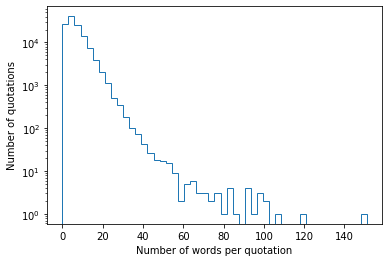

In [40]:
# Distribution of the number of words per quotation
plt.hist(analyze_select["len_quote"], bins=50, histtype='step', log=True)
#plt.axvline(x=0.5, linewidth=2, color='r')
plt.xlabel('Number of words per quotation')
plt.ylabel('Number of quotations')

In [41]:
# Number of quotations with 0 words
print(str(analyze_select[analyze_select["len_quote"]==0].shape[0]) + " quotations with 0 words.")

# Dropping quotations with 0 words
indexNames = analyze_select[analyze_select["len_quote"]==0].index
analyze_select.drop(indexNames, inplace=True)

# Number of quotations with 0 words
print(str(analyze_select[analyze_select["len_quote"]==0].shape[0]) + " quotations with 0 words.")

206 quotations with 0 words.
0 quotations with 0 words.


In [42]:
# Dropping quotations with 0 words
df_select.drop(indexNames, inplace=True)

In [43]:
# Median of the number of words per quotation
analyze_select["len_quote"].median()

6.0

In [44]:
# % of total lines dropped
(df.shape[0] - df_select.shape[0])*100/df.shape[0]

40.748432734053885

### 2.4) Final adjustments  <a class="anchor" id="I.2.4"></a>

In [45]:
# Converting the date column into date format
df_select.date = pd.to_datetime(df_select.date)

df_select is the final dataframe that we will use to answers our questions.

# Part II. Our project about Trump  <a class="anchor" id="PartII"></a>

**_=> QUESTIONS:_**

- **Trump's speech:**
    - 1: What were Donald Trump’s favorite topics to talk about during the campaign (starting in 2015)? and his time in office (20/01/2017 - 20/01/2021)? Is there a change in Trump’s speech/favorite topics between before and after he was elected?
    - 2: How well aligned are Trump’s quotes with its political agenda/program? How close was Donald Trump's presidency from his initial program? Does Trump live up to what he announces (concrete action)?
    - 3: Can we note different periods? Can we correlate changes in the ideas expressed by Trump with external events?  


- **External View about Trump:**
    - 4: Can we quantify Trump popularity over time and correlate it with external events? Can we see the impact of his speech on the population (different groups?)?
    - 5: In which newspapers the quotations of Trump are published? Is there a link between the newspapers that published the most quotations of Trump and the political appartenance of these newspapers?
    - 6: What insight can we get from the difference between quotations from a speaker and quotations about a speaker?
    
**_=> TOOLS:_**  
- Topics extraction (LDA) 
- Pre-trained sentiment analysis model
- Additional metadata

- **_=> SOLUTIONS:_** 
    - 1: Split Trump's quotes into two periods and apply the LDA to each and compare. If the LDA doesn't work with only two documents, we can separate a smaller one and then find a way to aggregate the data. 
    - 2: Interpretation: we look at the actions of Trumps and compare them to the subjects found in question 1. 
    - 3: We apply the same principle as question 1 but with very small periods to see the evolution over time. Then we interpret with external events of the news. 
    - 4: Apply Pre-trained sentiment analysis model on quotations about Trump (see positive or negative opinions). We look over time to compare with the topics that Trump addresses over time + We see if different population groups emerge and identify these groups with the data we have on speakers + We also compare the population impact results with the polls on Trump's popularity. 
    - 5: Extract newspaper names from the URL. We see if Trump's quotes are more or less cited in certain newspapers + We look at whether the topics of Trump's quotes are distributed uniformly or not between the newspapers + We look at the quotes about Trump to see if certain magazines are more or less in favor of Trump. 
    - 6: We take the two groups (quotes from Trump and quotes about Trump). Separate into topics with the LDA. Then on each topic and on each group we apply the pre-trained sentiment analysis model and we compare between the two groups.

## 0) LDA function  <a class="anchor" id="II.0"></a>

LDA for topic extraction will be needed to answer multiple questions. Below is implemented the `timechunk_lda` function which aggregates quotations into range of dates of a given size and applies LDA on these aggregated documents. 

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import math
import numpy as np

def make_timechunks(chunksize, min_dt, max_dt):
    '''make timechunks of size chunksize starting at min_dt and ending at max_dt'''
    delta = pd.Timedelta(chunksize)
    num_iters = math.ceil((max_dt-min_dt)/delta)
    a = min_dt
    b = min_dt
    timechunks = []
    for _ in range(num_iters):
        b = a+delta
        timechunks.append([a, b])
        a = b 
    return timechunks

def get_words_and_weights(lda, feature_names, n_top):
    '''get_words_and_weights: retrieve topic words and their weights for each topic'''
    topic_ids = []
    topic_words = []
    words_weights = []
    for topic_id, topic in enumerate(lda.components_):
        top_features_ind = topic.argsort()[: -n_top - 1 : -1]
        top_words = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        topic_ids.append(topic_id)
        topic_words.append(top_words)
        words_weights.append(weights)
    return topic_ids, topic_words, words_weights

def timechunk_lda(df, text_col, dt_col, chunksize, n_components, n_top=10, 
                  max_iter=15, random_state=2, max_df=0.95, min_df=1, 
                  max_features=1000):
    '''timechunk_lda: Aggregate quotes into date ranges of size chunksize and perform
                      latent dirichlet allocation to extract topic
    Inputs:
    -------
    - df: input dataframe
    - text_col: column containing text (either as strings or list of strings) in df
    - dt_col: column containing Timestamps in df
    - chunksize: size of chunks in days, e.g. '10D' == 10 days
    - n_components: number of different topics to model
    - n_top: number of top words to consider when summarizing a topic
    - max_iter: maximum number of iteration for online lda
    - random_state: lda random state
    - max_df: When building the vocabulary ignore terms that have a document frequency 
              strictly higher than the given threshold (corpus-specific stop words). 
              If float, the parameter represents a proportion of documents, integer 
              absolute counts. This parameter is ignored if vocabulary is not None.
    - min_df: When building the vocabulary ignore terms that have a document frequency 
              strictly lower than the given threshold. This value is also called cut-off 
              in the literature. If float, the parameter represents a proportion of 
              documents, integer absolute counts. This parameter is ignored if vocabulary 
              is not None.
    - max_features: vocabulary size
    
    Outputs:
    --------
    - df: input df with two additional columns, `topic_id_{chunksize}` the assigned topic
          and `topics_dist_{chunksize}` the topic assignment distribution.
    - topics_df: topics dataframe, contains topic_id, words and normalized word weight
                 for each topic.
    - timechunks_df: timechunks dataframe, contains start date (included) and end date 
                     (excluded) of each chunk.'''
    # Transform text column to string if passed as list of strings
    created_text_col = False
    if type(df[text_col].to_list()[0]) == list:
        df['str_text_col'] = df[text_col].apply(lambda x: ' '.join(x))
        text_col = 'str_text_col'
        created_text_col = True
    # Create vectorizer and lda objects
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, 
                                 max_features=max_features, 
                                 stop_words="english")
    lda = LatentDirichletAllocation(n_components=n_components,
                                    max_iter=max_iter,
                                    learning_method="online",
                                    random_state=random_state)
    # Aggregate documents according to passed chunksize
    documents = []
    documents_lengths = []
    timechunks = make_timechunks(chunksize, df[dt_col].min(), df[dt_col].max())
    for chunk in timechunks:
        document_list = df[
            df[dt_col].between(chunk[0], chunk[1], inclusive='left')
        ][text_col].to_list()
        documents.append(' '.join(document_list))
        documents_lengths.append(len(document_list))
    # Vectorize data
    tokens = vectorizer.fit_transform(documents)
    # Compute topic distribution for each document and assigned topic (argmax)
    assigned_topics = lda.fit_transform(tokens)
    topics_dist_column = []
    topics_column = []
    total_length = 0
    for document_length, assigned_topic in zip(documents_lengths, assigned_topics):
        total_length += document_length
        topics_dist_column.extend(document_length*[list(assigned_topic)])
        topics_column.extend(document_length*[assigned_topic.argmax()])
    # Add to dataframe
    df[f'topic_id_{chunksize}'] = topics_column
    df[f'topics_dist_{chunksize}'] = topics_dist_column
    # Retrieve topic words and associated words
    topic_ids, topic_words, words_weights = get_words_and_weights(
        lda, vectorizer.get_feature_names_out(), n_top
    )
    # Create topic dataframe with topic_id, chunksize, [word, normalized_weight]
    # normalized weight computed with normalized exponential (softmax) of word weight
    # for each topic
    colnames = ['topic_id', 'chunksize']
    for i in range(1, n_top+1):
        colnames.append(f'topic_word_{i}')
        colnames.append(f'normalized_weight_{i}')
    topics_df = pd.DataFrame(columns=colnames)
    for topic_id, words, weights in zip(topic_ids, topic_words, words_weights):
        tmp = [topic_id, chunksize]
        denom = np.exp(np.array(weights)).sum()
        for word, weight in zip(words, weights):
            normalized_weight = np.exp(weight)/denom
            tmp.extend([word, normalized_weight])
        topics_df.loc[len(topics_df.index)] = tmp
    # Make timechunks_df
    timechunks_df = pd.DataFrame(columns=['start_date', 'end_date'])
    timechunks_df['start_date'] = [chunk[0] for chunk in timechunks]
    timechunks_df['end_date'] = [chunk[1] for chunk in timechunks]
    # Delete additional text column if added
    if created_text_col:
        df.drop(columns=['str_text_col'], inplace=True)
    return df, topics_df, timechunks_df

In [121]:
chunksize = '14D'
df_select_with_topics, topics_df, timechunks_df = timechunk_lda(
    df_select, 'final_quote_SelectWd', 'date', chunksize, 3, 5
)
np.unique(df_select_with_topics[f'topic_id_{chunksize}'].values)

array([0, 1, 2])

In [122]:
topics_df

,topic_id,chunksize,topic_word_1,normalized_weight_1,topic_word_2,normalized_weight_2,topic_word_3,normalized_weight_3,topic_word_4,normalized_weight_4,topic_word_5,normalized_weight_5
0,0,14D,match,1.00000,hong,2.293880e-18,kong,2.723444e-21,billion,6.866005e-28,floor,2.592345e-39
1,1,14D,impeachment,1.00000,ukraine,1.012202e-37,whistleblower,2.796001e-72,christmas,1.126688e-72,inquiry,7.350801e-74
2,2,14D,facebook,0.97703,novel,2.150814e-02,wear,1.011502e-03,shutdown,4.317967e-04,impeachment,1.816890e-05


In [123]:
timechunks_df

,start_date,end_date
0,2019-01-01,2019-01-15
1,2019-01-15,2019-01-29
2,2019-01-29,2019-02-12
3,2019-02-12,2019-02-26
4,2019-02-26,2019-03-12
5,2019-03-12,2019-03-26
6,2019-03-26,2019-04-09
7,2019-04-09,2019-04-23
8,2019-04-23,2019-05-07
9,2019-05-07,2019-05-21


## 1) Trump's quotations  <a class="anchor" id="II.1"></a>

In [ ]:
# Construction of a dataframe with Trump's quotations
Trump_spk = df_select[df_select.speaker.str.lower().str.contains("trump")].copy(deep=True)
display(Trump_spk.shape)
display(Trump_spk.head())

### 1.1) Question 1  <a class="anchor" id="II.1.1"></a>

_What were Donald Trump’s favorite topics to talk about during the campaign (starting in 2015)? and his time in office (20/01/2017 - 20/01/2021)? Is there a change in Trump’s speech/favorite topics between before and after he was elected?_

In [ ]:
# Creating maks for the campaign and the post-campaign period
mask_campaign = (df['date'] >= '2015-01-01') & (df['date'] < '2017-01-20')
mask_postcampaign = (df['date'] >= '2017-01-20') & (df['date'] <= '2021-01-20')

#Trump_spk[mask_campaign]
#Trump_spk[mask_postcampaign]

## 2) Quotations about Trump  <a class="anchor" id="II.2"></a>

In [ ]:
# Construction of a daraframe with quotations about Trump
Trump_topic = df_select[df_select.final_quote_SelectWd.apply(lambda x : ' '.join(x)).str.contains("trump")].copy(deep=True)
Trump_topic.drop(Trump_topic[Trump_topic.speaker.str.lower().str.contains("trump")].index, inplace=True)
display(Trump_topic.shape)
display(Trump_topic.head())

**TODO : Ajouter le fichier donnant les informations sur les speakers**

**A CONTINUER**  
...  
...  